In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

Churn for Bank Customers ([on Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers)) 

In [3]:
import re
def case_to_name(s):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', s).lower()\
        .replace('_i_d', '_id').replace('_t_v', '_tv')

raw_df = pd.read_csv('churn.csv')
raw_df.columns = raw_df.columns.map(case_to_name)
raw_df.head(7)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [4]:
dimensions = ['gender', 'geography', 'num_of_products', 'has_cr_card',
             'is_active_member', 'credit_score', 'age',
             'balance', 'tenure', 'estimated_salary']
df = raw_df[dimensions]
y = raw_df['exited']
df.head(7)

# For PRIM implementation that does not work with categorical data, you may uncomment the following code.
# However, I would advice to use One-Hot Encoding instead

# from sklearn.preprocessing import LabelEncoder
# le_gender = LabelEncoder()
# le_geography = LabelEncoder()
# df['gender'] = le_gender.fit_transform(df['gender'])
# df['geography'] = le_geography.fit_transform(df['geography'])

,gender,geography,num_of_products,has_cr_card,is_active_member,credit_score,age,balance,tenure,estimated_salary
0,Female,France,1,1,1,619,42,0.00,2,101348.88
1,Female,Spain,1,0,1,608,41,83807.86,1,112542.58
2,Female,France,3,1,0,502,42,159660.80,8,113931.57
3,Female,France,2,0,0,699,39,0.00,1,93826.63
4,Female,Spain,1,1,1,850,43,125510.82,2,79084.10
5,Male,Spain,2,1,0,645,44,113755.78,8,149756.71
6,Male,France,2,1,1,822,50,0.00,7,10062.80


In [5]:
# Uncomment the following rows if you want to edit PRIM logic and debug it from the notebook

# %load_ext autoreload
# %autoreload 2
# %config Application.log_level='INFO'

from prim import PRIM

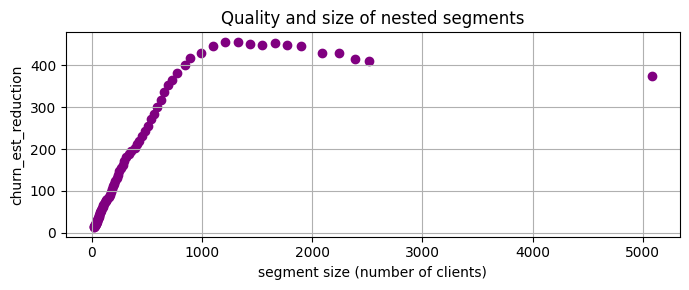

In [6]:
sd_prim = PRIM()
sd_prim.fit(df, y)

plt.figure(figsize=(7, 3))
plt.scatter(sd_prim.get_size(), sd_prim.get_qual(), c='purple', marker='o')
plt.title('Quality and size of nested segments')
plt.xlabel('segment size (number of clients)')
plt.ylabel('churn_est_reduction')
plt.grid(True)

# Save the plot to a file before displaying it
plt.tight_layout()
plt.savefig('quality_size_plot_1.png')

plt.show()

In [7]:
best_segment = np.argmax(sd_prim.get_qual())
print(best_segment)
print(sd_prim.get_rules(best_segment))
print(sd_prim.get_size()[best_segment])
print(sd_prim.get_qual()[best_segment])

10
num_of_products < 2, is_active_member < 1, age > 37
1332
456.6716


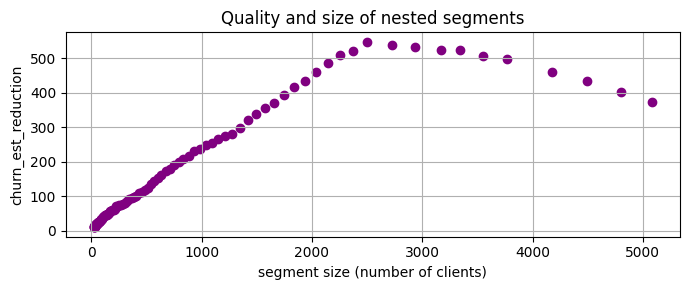

In [8]:
sd_prim = PRIM(patience=2)
sd_prim.fit(df, y)

plt.figure(figsize=(7, 3))
plt.scatter(sd_prim.get_size(), sd_prim.get_qual(), c='purple', marker='o')
plt.title('Quality and size of nested segments')
plt.xlabel('segment size (number of clients)')
plt.ylabel('churn_est_reduction')
plt.grid(True)

# Save the plot to a file before displaying it
plt.tight_layout()
plt.savefig('quality_size_plot_2.png')

plt.show()

In [9]:
best_segment = np.argmax(sd_prim.get_qual())
print(sd_prim.get_rules(best_segment))
print(sd_prim.get_size()[best_segment])
print(sd_prim.get_qual()[best_segment])

num_of_products < 2, age > 37, age < 64
2502
548.3426000000001


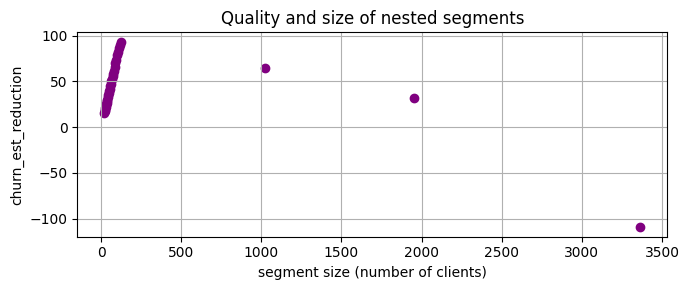

In [10]:
ind = (df['num_of_products'] < 2) & (df['age'] > 37) & (df['age'] < 64)
bsl = np.count_nonzero(y)/len(y) # store the original baseline churn rate level for further segmentation
df_after_one_iter = df[~ind]
y_after_one_iter = y[~ind]

sd_prim = PRIM(patience=0, bslevel= bsl)
sd_prim.fit(df_after_one_iter, y_after_one_iter)

plt.figure(figsize=(7, 3))
plt.scatter(sd_prim.get_size(), sd_prim.get_qual(), c='purple', marker='o')
plt.title('Quality and size of nested segments')
plt.xlabel('segment size (number of clients)')
plt.ylabel('churn_est_reduction')
plt.grid(True)

# Save the plot to a file before displaying it
plt.tight_layout()
plt.savefig('quality_size_plot_3.png')

plt.show()

In [11]:
best_segment = np.argmax(sd_prim.get_qual())
print(sd_prim.get_rules(best_segment))
print(sd_prim.get_size()[best_segment])
print(sd_prim.get_qual()[best_segment])

gender != 'Male', num_of_products > 2, balance > 0.0
126
93.3338
